In [9]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [10]:
ratio = 5
dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_9/pbmc/tranvae/population_{ratio}/')
save_path = os.path.expanduser(f'~/Documents/master_thesis_figures/tranvae_rare/pbmc/')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [11]:
adata = sc.read(f'{dir_path}full_data.h5ad')
adata

AnnData object with n_obs × n_vars = 31984 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [12]:
n_cells = len(adata)
n_delta = len(adata[adata.obs.celltype.isin(['CD16+ Monocytes'])])
ref_adata = adata[~adata.obs.batch.isin(['Freytag'])].copy()
query_adata = adata[adata.obs.batch.isin(['Freytag'])].copy()

n_delta_r = len(ref_adata[ref_adata.obs.celltype.isin(['CD16+ Monocytes'])])
n_delta_q = len(query_adata[query_adata.obs.celltype.isin(['CD16+ Monocytes'])])

print(f"DELTA IN ALL: {n_delta}")
print(f"DELTA IN REF: {n_delta_r}")
print(f"DELTA IN QUERY: {n_delta_q}")
print(f"DELTA PERCENTAGE: {(n_delta/n_cells)*100}%")

DELTA IN ALL: 325
DELTA IN REF: 300
DELTA IN QUERY: 25
DELTA PERCENTAGE: 1.0161330665332666%


In [13]:
from sklearn.metrics import classification_report
truth = query_adata.obs.celltype.tolist()
pred = query_adata.obs.predictions.tolist()
print(classification_report(truth, pred))

                                  precision    recall  f1-score   support

                   CD10+ B cells       0.00      0.00      0.00         0
                 CD14+ Monocytes       1.00      0.96      0.98       452
                 CD16+ Monocytes       0.86      1.00      0.93        25
                   CD20+ B cells       1.00      0.98      0.99       427
                    CD4+ T cells       0.93      0.92      0.92      1238
                    CD8+ T cells       0.56      0.77      0.65       270
                           HSPCs       0.00      0.00      0.00         0
       Megakaryocyte progenitors       0.94      1.00      0.97        16
            Monocyte progenitors       0.00      0.00      0.00         0
Monocyte-derived dendritic cells       0.00      0.00      0.00         0
                        NK cells       0.99      0.67      0.80       476
                       NKT cells       0.71      0.82      0.76       432
                    Plasma cells     

In [5]:
adata.obs.batch = adata.obs.batch.replace('Freytag', 'Freytag (query)')
adata.obs.celltype = adata.obs.celltype.replace('CD16+ Monocytes', 'CD16+ Monocytes (rare)')

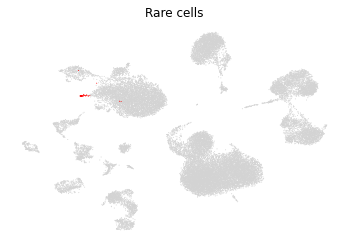

In [6]:
sc.pl.umap(
    adata,
    color="celltype",
    groups='CD16+ Monocytes (rare)',
    #title='',
    title='Rare cells',
    legend_loc="no_legend",
    frameon=False,
    ncols=1,
    show=False,
    palette=['red']
)
plt.savefig(f"{save_path}{ratio}_rare_ct.pdf", bbox_inches='tight')

In [7]:
p_b = sns.color_palette("husl", 9)

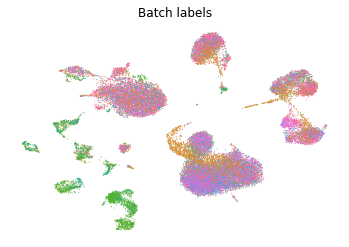

In [8]:
sc.pl.umap(
    adata,
    color="batch",
    frameon=False,
    #title='',
    title='Batch labels',
    legend_loc="no_legend",
    ncols=1,
    show=False,
    palette=p_b
)
plt.savefig(f"{save_path}{ratio}_batch.pdf", bbox_inches='tight')

In [9]:
p_c = sns.color_palette("hls", 16)

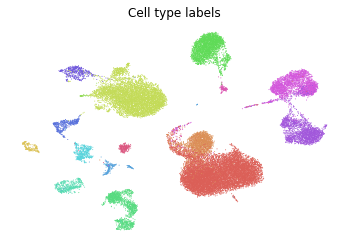

In [10]:
sc.pl.umap(
    adata,
    color="celltype",
    legend_loc="no_legend",
    #title='',
    title='Cell type labels',
    frameon=False,
    ncols=1,
    show=False,
    palette=p_c
)
plt.savefig(f"{save_path}{ratio}_celltype.pdf", bbox_inches='tight')